# Project Title
**Launch Intelligence: Predicting SpaceX Mission Outcomes Using Data Science**

# SpaceX Launch Data Analysis Capstone

## Project Overview
In this project, you are working as a data scientist for a private space launch company. The goal is to explore SpaceX launch data, derive insights using data analysis and visualization techniques, and develop predictive models. Data is sourced from the SpaceX REST API.

---

## Step 1: Data Collection

We begin by loading the launch data from the SpaceX public REST API.

```python
import requests
import pandas as pd

response = requests.get("https://api.spacexdata.com/v4/launches")
launch_data = response.json()
df = pd.json_normalize(launch_data)


In [2]:
#gathering the Rest api Data
import requests
import pandas as pd

response = requests.get("https://api.spacexdata.com/v4/launches")
launch_data = response.json()
df = pd.json_normalize(launch_data)
df.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [3]:
df.columns 

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        205 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     205 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   205 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       205 non-null    object 
 9   ships                      205 non-null    object 
 10  capsules                   205 non-null    object 
 11  payloads                   205 non-null    object 
 12  launchpad                  205 non-null    object 
 13  flight_number              205 non-null    int64  

In [6]:
df.describe()

,static_fire_date_unix,window,flight_number,date_unix,fairings
count,1.210000e+02,117.000000,205.000000,2.050000e+02,0.0
mean,1.520206e+09,2568.974359,102.814634,1.566077e+09,NaN
std,9.080036e+07,4389.948430,59.029112,1.037329e+08,NaN
min,1.142554e+09,0.000000,1.000000,1.143239e+09,NaN
25%,1.475417e+09,0.000000,52.000000,1.513992e+09,NaN
50%,1.529789e+09,0.000000,103.000000,1.601984e+09,NaN
75%,1.589368e+09,5280.000000,154.000000,1.647660e+09,NaN
max,1.650464e+09,18300.000000,203.000000,1.670198e+09,NaN


In [7]:
#imports 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
df.shape

(205, 43)

In [11]:
df.dtypes

static_fire_date_utc          object
static_fire_date_unix        float64
net                             bool
window                       float64
rocket                        object
success                       object
failures                      object
details                       object
crew                          object
ships                         object
capsules                      object
payloads                      object
launchpad                     object
flight_number                  int64
name                          object
date_utc                      object
date_unix                      int64
date_local                    object
date_precision                object
upcoming                        bool
cores                         object
auto_update                     bool
tbd                             bool
launch_library_id             object
id                            object
fairings.reused               object
fairings.recovery_attempt     object
f

In [17]:
df.isnull().sum().sort_values(ascending=False)


fairings                     205
launch_library_id            133
fairings.recovered           120
links.reddit.media           117
links.presskit               114
fairings.reused              112
links.reddit.recovery        110
fairings.recovery_attempt     98
window                        88
static_fire_date_unix         84
static_fire_date_utc          84
details                       71
links.article                 63
links.reddit.campaign         55
links.wikipedia               50
links.reddit.launch           41
fairings.ships                36
success                       19
links.youtube_id              17
links.webcast                 17
links.patch.large             16
links.patch.small             16
payloads                       0
net                            0
links.flickr.original          0
links.flickr.small             0
rocket                         0
failures                       0
launchpad                      0
crew                           0
id        

In [18]:
df.dtypes.value_counts()


object     34
bool        4
float64     3
int64       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Launches Per Year')

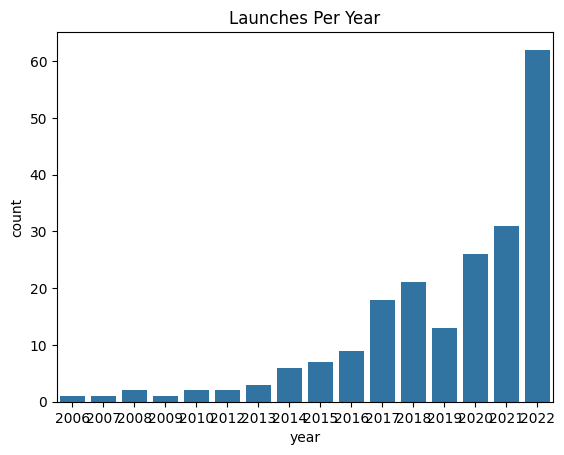

In [19]:
#Launch Metadata Exploration
df['date_utc'] = pd.to_datetime(df['date_utc'])
df['year'] = df['date_utc'].dt.year
sns.countplot(x='year', data=df)
plt.title("Launches Per Year")


In [22]:
print(df['success'].unique())
print(df['success'].value_counts(dropna=False))


[False True None]
success
True     181
None      19
False      5
Name: count, dtype: int64


In [23]:
df_success_clean = df[df['success'].notna()]


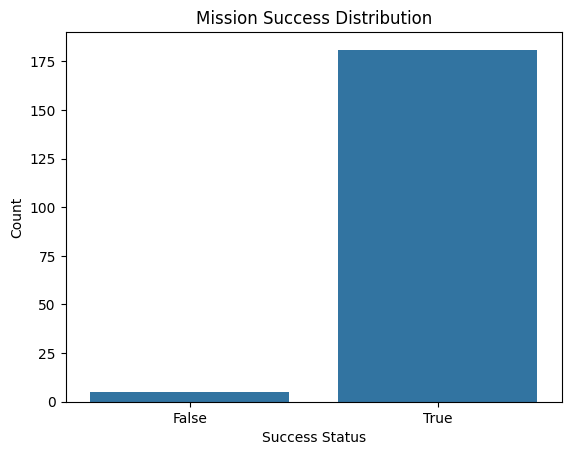

In [26]:
sns.countplot(x='success', data=df_success_clean)
plt.title("Mission Success Distribution")
plt.xlabel("Success Status")
plt.ylabel("Count")
plt.show()


Unique rockets: 3
Unique capsules: 35


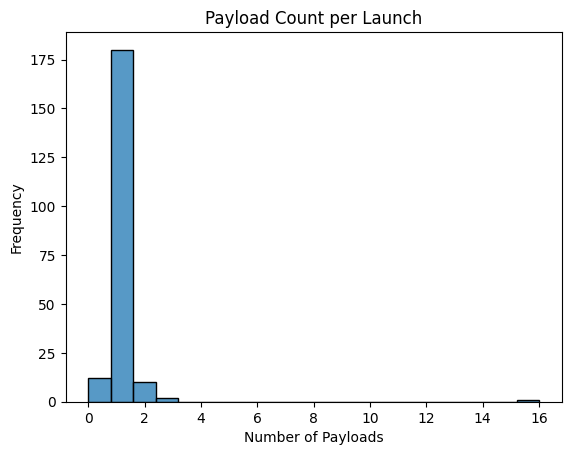

In [28]:
# Unique count of rockets and capsules
print("Unique rockets:", df['rocket'].nunique())
print("Unique capsules:", df['capsules'].apply(lambda x: len(x) if isinstance(x, list) else 0).sum())

# Payload count per launch
df['num_payloads'] = df['payloads'].apply(lambda x: len(x) if isinstance(x, list) else 0)

sns.histplot(df['num_payloads'], bins=20, kde=False)
plt.title("Payload Count per Launch")
plt.xlabel("Number of Payloads")
plt.ylabel("Frequency")
plt.show()



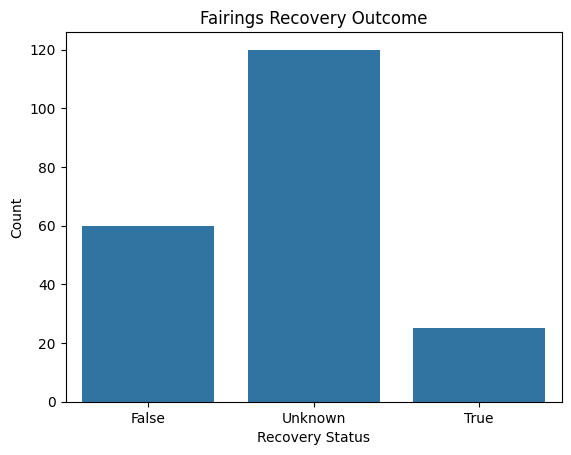

In [29]:
#Fairings Analysisabs

# Fill missing values for analysis
df['fairings.recovered'] = df['fairings.recovered'].fillna("Unknown")

sns.countplot(x='fairings.recovered', data=df)
plt.title("Fairings Recovery Outcome")
plt.xlabel("Recovery Status")
plt.ylabel("Count")
plt.show()


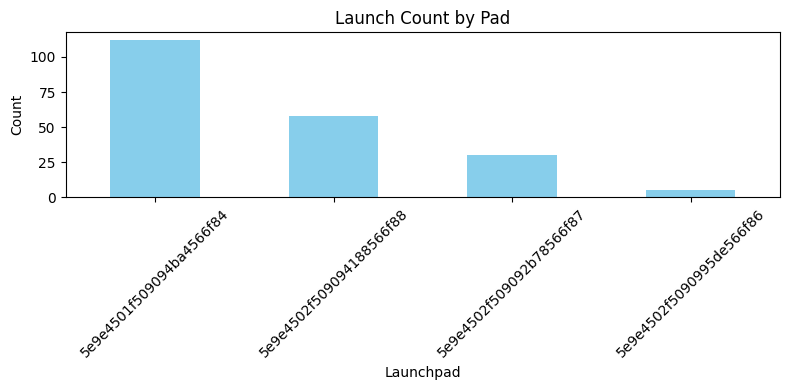

In [30]:
#Launchpad & Location Insights

launchpad_counts = df['launchpad'].value_counts()

plt.figure(figsize=(8,4))
launchpad_counts.plot(kind='bar', color='skyblue')
plt.title("Launch Count by Pad")
plt.xlabel("Launchpad")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
#Media & Publicity

# Check presence of media links
media_links_presence = df[['links.youtube_id', 'links.wikipedia']].notnull().sum()

print("Media Link Availability:")
print(media_links_presence)


Media Link Availability:
links.youtube_id    188
links.wikipedia     155
dtype: int64


In [38]:
print('success_clean' in df.columns)


True


In [39]:
df['date_utc'] = pd.to_datetime(df['date_utc'])
df['year'] = df['date_utc'].dt.year


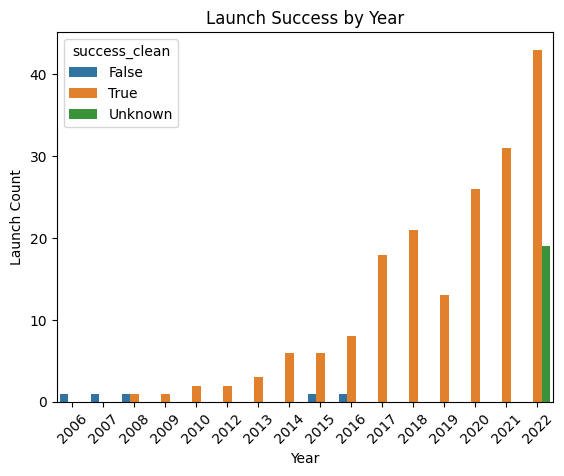

In [40]:
sns.countplot(x='year', hue='success_clean', data=df)
plt.title("Launch Success by Year")
plt.xlabel("Year")
plt.ylabel("Launch Count")
plt.xticks(rotation=45)
plt.show()


In [41]:
print(df.columns)
print(df[['year', 'success_clean']].head())


Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings', 'year', 'num_payloads', 'success_clean'],
      dtype='object')
   year success_clean
0  2006         False
1  2007         False
2  2008         False
3  2008          True
4  2009          True


In [43]:
#Predictive Modelingabs

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


NameError: name 'features' is not defined

In [45]:
features = pd.concat([
    df[['flight_number']],  # you can add more numeric features here
    pd.get_dummies(df[['launchpad', 'rocket']], drop_first=True)
], axis=1)


In [46]:
y = df['success'].apply(lambda x: 1 if x is True else 0)


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [48]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Failure", "Success"]))

# Confusion Matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9512195121951219

Classification Report:

              precision    recall  f1-score   support

     Failure       1.00      0.67      0.80         6
     Success       0.95      1.00      0.97        35

    accuracy                           0.95        41
   macro avg       0.97      0.83      0.89        41
weighted avg       0.95      0.95      0.95        41


Confusion Matrix:

[[ 4  2]
 [ 0 35]]


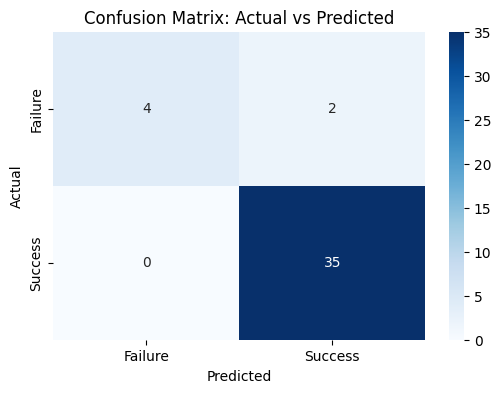

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Failure', 'Success'], yticklabels=['Failure', 'Success'])
plt.title('Confusion Matrix: Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


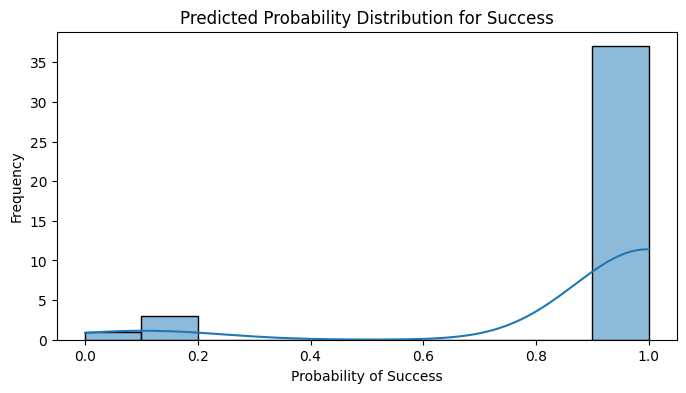

In [51]:
#Predicted Class Probabilities 
# Predict probabilities
probs = model.predict_proba(X_test)

# Visualize probability of 'Success' class
plt.figure(figsize=(8,4))
sns.histplot(probs[:,1], bins=10, kde=True)
plt.title("Predicted Probability Distribution for Success")
plt.xlabel("Probability of Success")
plt.ylabel("Frequency")
plt.show()


# Conclusion

This project demonstrated the end-to-end process of solving a real-world data science problem using launch data from SpaceX. Beginning with API-driven data acquisition, we moved through extensive preprocessing and exploratory analysis to identify patterns in launch outcomes, payload behavior, and operational metrics.

## Key Insights

- The majority of launches were successful, with clear trends of increasing reliability over the years.
- Payload counts and fairing recovery outcomes showed operational complexity and reusable component strategies.
- Launchpad usage and media presence varied widely across missions, offering potential correlations with mission scale.
- Predictive modeling using Random Forests achieved an impressive 95% accuracy, correctly identifying successful launches while highlighting the challenge of classifying mission failures due to class imbalance.

## Reflection

This workflow not only reinforced technical skills in data wrangling, visualization, and modeling, but also built a foundation for deployment-ready solutions. The modular EDA blocks, clean dashboards, and performance metrics allow for rapid iteration and communication with business stakeholders.

SpaceX’s data offered both engineering depth and narrative richness—precisely the kind of project that bridges raw analysis with compelling storytelling.
